# Tuk Tuk Tournament - Adventure Across Sri Lanka

In [259]:
pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 3.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.69
    Uninstalling botocore-1.34.69:
      Successfully uninstalled botocore-1.34.69
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.37.6 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


### Step 1: Data Reading

In [13]:
import os
os.chdir("/Users/jam/msc/course-works")
print(os.getcwd())  # Verify the change

/Users/jam/msc/course-works


In [139]:
import pandas as pd
df = pd.read_csv("challenges_completed_2024.csv")
df.head()

,team_name,challenge_type,location_name,location_zone,location_area,questbook,MaxPerDay,MaxPerTTT,questbook_name,questbook_category,...,updatedAt,comment_status,report_comment,comment_team_name,admin_comment,day,comments_count,initiated,latitude,longitude
0,Pyxar,questbook,NaN,NaN,NaN,TOURNAMENT SONG,1.0,1.0,TOURNAMENT SONG,RavanasVeena,...,1/11/2024 6:01pm,NaN,NaN,NaN,NaN,2024-11-01,0,1/11/2024 9:46am,NaN,NaN
1,TheStones,questbook,NaN,NaN,NaN,BEACH CLEAN,1.0,5.0,BEACH CLEAN,AranyanisRing,...,1/11/2024 5:19pm,NaN,NaN,NaN,NaN,2024-11-01,0,1/11/2024 2:06pm,NaN,NaN
2,FRENCHTUKTUKADVENTURE,questbook,NaN,NaN,NaN,ROADSIDE FRUIT,1.0,10.0,ROADSIDE FRUIT,QueenSitasCloak,...,1/11/2024 4:19pm,NaN,NaN,NaN,NaN,2024-11-01,0,1/11/2024 2:45pm,NaN,NaN
3,FRENCHTUKTUKADVENTURE,questbook,NaN,NaN,NaN,ROADSIDE FRUIT,1.0,10.0,ROADSIDE FRUIT,QueenSitasCloak,...,1/11/2024 4:19pm,NaN,NaN,NaN,NaN,2024-11-01,0,1/11/2024 2:45pm,NaN,NaN
4,BaNaNaPeeLerZ,questbook,NaN,NaN,NaN,LOCAL LEGEND,1.0,5.0,LOCAL LEGEND,PrimalRoar,...,1/11/2024 4:03pm,NaN,NaN,NaN,NaN,2024-11-01,0,1/11/2024 4:03pm,NaN,NaN


### Step 2: Understanding Data

In [141]:
df.columns

Index(['team_name', 'challenge_type', 'location_name', 'location_zone',
       'location_area', 'questbook', 'MaxPerDay', 'MaxPerTTT',
       'questbook_name', 'questbook_category', 'questbook_type', 'points',
       'seekers_portion', 'partner_team_name', 'media_type', 'caption',
       'deleted', 'created', 'updatedAt', 'comment_status', 'report_comment',
       'comment_team_name', 'admin_comment', 'day', 'comments_count',
       'initiated', 'latitude', 'longitude'],
      dtype='object')

In [143]:
df.shape

(17907, 28)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17907 entries, 0 to 17906
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   team_name           17907 non-null  object 
 1   challenge_type      17907 non-null  object 
 2   location_name       5405 non-null   object 
 3   location_zone       5405 non-null   float64
 4   location_area       5405 non-null   object 
 5   questbook           12502 non-null  object 
 6   MaxPerDay           12502 non-null  float64
 7   MaxPerTTT           12502 non-null  float64
 8   questbook_name      12502 non-null  object 
 9   questbook_category  12502 non-null  object 
 10  questbook_type      12502 non-null  object 
 11  points              17907 non-null  int64  
 12  seekers_portion     996 non-null    object 
 13  partner_team_name   769 non-null    object 
 14  media_type          17907 non-null  object 
 15  caption             9915 non-null   object 
 16  dele

In [147]:
df.isnull().sum()

team_name                 0
challenge_type            0
location_name         12502
location_zone         12502
location_area         12502
questbook              5405
MaxPerDay              5405
MaxPerTTT              5405
questbook_name         5405
questbook_category     5405
questbook_type         5405
points                    0
seekers_portion       16911
partner_team_name     17138
media_type                0
caption                7992
deleted               17659
created                   0
updatedAt                 0
comment_status        17384
report_comment        17384
comment_team_name     17384
admin_comment         17391
day                       0
comments_count            0
initiated                 0
latitude              12502
longitude             12502
dtype: int64

### Step 3: Data Cleaning

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17659 entries, 0 to 17906
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   team_name           17659 non-null  object 
 1   challenge_type      17659 non-null  object 
 2   location_name       5332 non-null   object 
 3   location_zone       5332 non-null   float64
 4   location_area       5332 non-null   object 
 5   questbook           12327 non-null  object 
 6   MaxPerDay           12327 non-null  float64
 7   MaxPerTTT           12327 non-null  float64
 8   questbook_name      12327 non-null  object 
 9   questbook_category  12327 non-null  object 
 10  questbook_type      12327 non-null  object 
 11  points              17659 non-null  int64  
 12  seekers_portion     985 non-null    object 
 13  partner_team_name   769 non-null    object 
 14  media_type          17659 non-null  object 
 15  caption             9787 non-null   object 
 16  deleted  

In [151]:
# change NAN values to 0 and other values to 1
df["deleted"] = df["deleted"].notna().astype(int)

In [153]:
# It's safer to delete the deleted = 1 data set
print(df[df["deleted"] == 1].shape[0], "rows with deleted true")
print(df[df["deleted"] == 0].shape[0], "rows with deleted false")

248 rows with deleted true
17659 rows with deleted false


In [155]:
df.shape

(17907, 28)

In [157]:
df = df[df["deleted"] != 1]

In [159]:
df.shape

(17659, 28)

In [175]:
# Summary statistics
print(df.describe())  

       location_zone     MaxPerDay    MaxPerTTT        points  deleted  \
count    5332.000000  12327.000000  12327.00000  17659.000000  17659.0   
mean     2542.516317      1.107488      3.78973      4.201370      0.0   
std      1168.241975      0.553966      3.46849      3.330358      0.0   
min      1010.000000      1.000000      1.00000      1.000000      0.0   
25%      2034.000000      1.000000      1.00000      2.000000      0.0   
50%      2125.500000      1.000000      2.00000      3.000000      0.0   
75%      3046.000000      1.000000      5.00000      5.000000      0.0   
max      5073.000000      5.000000     10.00000     39.000000      0.0   

       comments_count     latitude    longitude  
count    17659.000000  5332.000000  5332.000000  
mean         0.015629     6.921904    80.811353  
std          0.124496     0.770814     0.347170  
min          0.000000     5.921260    79.843826  
25%          0.000000     6.031544    80.596880  
50%          0.000000     6.98967

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17659 entries, 0 to 17906
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   team_name           17659 non-null  object 
 1   challenge_type      17659 non-null  object 
 2   location_name       5332 non-null   object 
 3   location_zone       5332 non-null   float64
 4   location_area       5332 non-null   object 
 5   questbook           12327 non-null  object 
 6   MaxPerDay           12327 non-null  float64
 7   MaxPerTTT           12327 non-null  float64
 8   questbook_name      12327 non-null  object 
 9   questbook_category  12327 non-null  object 
 10  questbook_type      12327 non-null  object 
 11  points              17659 non-null  int64  
 12  seekers_portion     985 non-null    object 
 13  partner_team_name   769 non-null    object 
 14  media_type          17659 non-null  object 
 15  caption             9787 non-null   object 
 16  deleted  

In [191]:
df.dtypes

team_name              object
challenge_type         object
location_name          object
location_zone         float64
location_area          object
questbook              object
MaxPerDay             float64
MaxPerTTT             float64
questbook_name         object
questbook_category     object
questbook_type         object
points                  int64
seekers_portion        object
partner_team_name      object
media_type             object
caption                object
deleted                 int64
created                object
updatedAt              object
comment_status         object
report_comment         object
comment_team_name      object
admin_comment          object
day                    object
comments_count          int64
initiated              object
latitude              float64
longitude             float64
dtype: object

### Data Cleaning

In [203]:
# fill missing values before conversion data types
df['location_zone'] = df['location_zone'].fillna(0).astype(int)
df['MaxPerDay'] = df['MaxPerDay'].fillna(0).astype(int)
df['MaxPerTTT'] = df['MaxPerTTT'].fillna(0).astype(int)

df.dtypes

team_name              object
challenge_type         object
location_name          object
location_zone           int64
location_area          object
questbook              object
MaxPerDay               int64
MaxPerTTT               int64
questbook_name         object
questbook_category     object
questbook_type         object
points                  int64
seekers_portion        object
partner_team_name      object
media_type             object
caption                object
deleted                 int64
created                object
updatedAt              object
comment_status         object
report_comment         object
comment_team_name      object
admin_comment          object
day                    object
comments_count          int64
initiated              object
latitude              float64
longitude             float64
dtype: object

In [ ]:
# convert initiated, created, updatedAt columns to date time type

In [205]:
df['initiated'] = pd.to_datetime(df['initiated'], format='%d/%m/%Y %I:%M%p')
df['created'] = pd.to_datetime(df['created'], format='%d/%m/%Y %I:%M%p')
df['updatedAt'] = pd.to_datetime(df['updatedAt'], format='%d/%m/%Y %I:%M%p')
df.dtypes

team_name                     object
challenge_type                object
location_name                 object
location_zone                  int64
location_area                 object
questbook                     object
MaxPerDay                      int64
MaxPerTTT                      int64
questbook_name                object
questbook_category            object
questbook_type                object
points                         int64
seekers_portion               object
partner_team_name             object
media_type                    object
caption                       object
deleted                        int64
created               datetime64[ns]
updatedAt             datetime64[ns]
comment_status                object
report_comment                object
comment_team_name             object
admin_comment                 object
day                           object
comments_count                 int64
initiated             datetime64[ns]
latitude                     float64
l

In [207]:
df.head()

,team_name,challenge_type,location_name,location_zone,location_area,questbook,MaxPerDay,MaxPerTTT,questbook_name,questbook_category,...,updatedAt,comment_status,report_comment,comment_team_name,admin_comment,day,comments_count,initiated,latitude,longitude
0,Pyxar,questbook,NaN,0,NaN,TOURNAMENT SONG,1,1,TOURNAMENT SONG,RavanasVeena,...,2024-11-01 18:01:00,NaN,NaN,NaN,NaN,2024-11-01,0,2024-11-01 09:46:00,NaN,NaN
1,TheStones,questbook,NaN,0,NaN,BEACH CLEAN,1,5,BEACH CLEAN,AranyanisRing,...,2024-11-01 17:19:00,NaN,NaN,NaN,NaN,2024-11-01,0,2024-11-01 14:06:00,NaN,NaN
2,FRENCHTUKTUKADVENTURE,questbook,NaN,0,NaN,ROADSIDE FRUIT,1,10,ROADSIDE FRUIT,QueenSitasCloak,...,2024-11-01 16:19:00,NaN,NaN,NaN,NaN,2024-11-01,0,2024-11-01 14:45:00,NaN,NaN
3,FRENCHTUKTUKADVENTURE,questbook,NaN,0,NaN,ROADSIDE FRUIT,1,10,ROADSIDE FRUIT,QueenSitasCloak,...,2024-11-01 16:19:00,NaN,NaN,NaN,NaN,2024-11-01,0,2024-11-01 14:45:00,NaN,NaN
4,BaNaNaPeeLerZ,questbook,NaN,0,NaN,LOCAL LEGEND,1,5,LOCAL LEGEND,PrimalRoar,...,2024-11-01 16:03:00,NaN,NaN,NaN,NaN,2024-11-01,0,2024-11-01 16:03:00,NaN,NaN


In [209]:
# save cleaned data set for future use
df.to_csv('/Users/jam/msc/course-works/tuktuk_data_2024_cleaned.csv', index=False)

### Data Visualization

In [215]:
# top 10 teams
top_teams = df.groupby('team_name')['points'].sum().reset_index()
.sort_values(by='points', ascending=False)
print("Top 10 Teams:\n", top_teams.head(10))

Top 10 Teams:
               team_name  points
19           GreatDanes    1772
8             CanuckTuk    1752
34                Pyxar    1610
15     Fantukkingtastic    1593
17              GETAFIX    1577
39         RoadTripperz    1559
47        TheBedrockers    1533
11          DaggyGreens    1523
70  WeTukontheFirstDate    1514
75           bamfamilia    1503


/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_1538/3071806758.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.head(10)['team_name'], y=top_teams.head(10)['points'], palette='viridis')


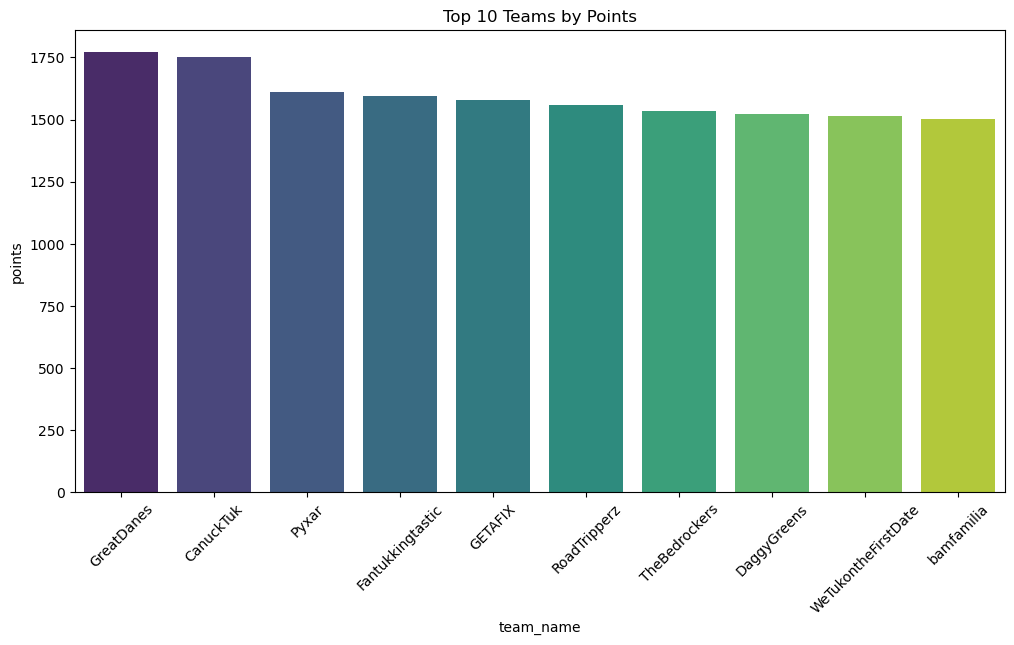

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=top_teams.head(10)['team_name'], y=top_teams.head(10)['points'], palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Teams by Points")
plt.show()

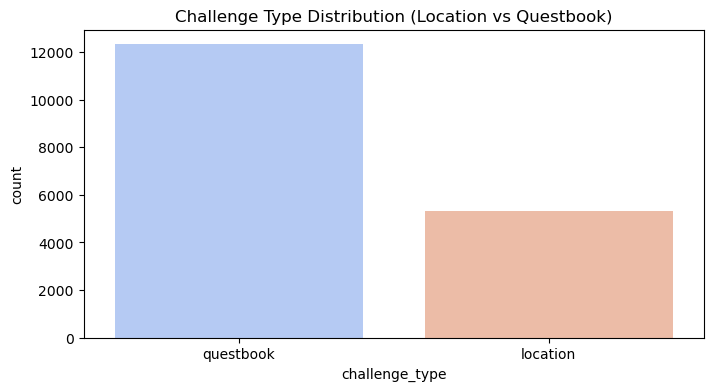

In [231]:
# Challenges Breakdown
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='challenge_type', palette='coolwarm', hue='challenge_type', legend=False)
plt.title("Challenge Type Distribution (Location vs Questbook)")
plt.show()


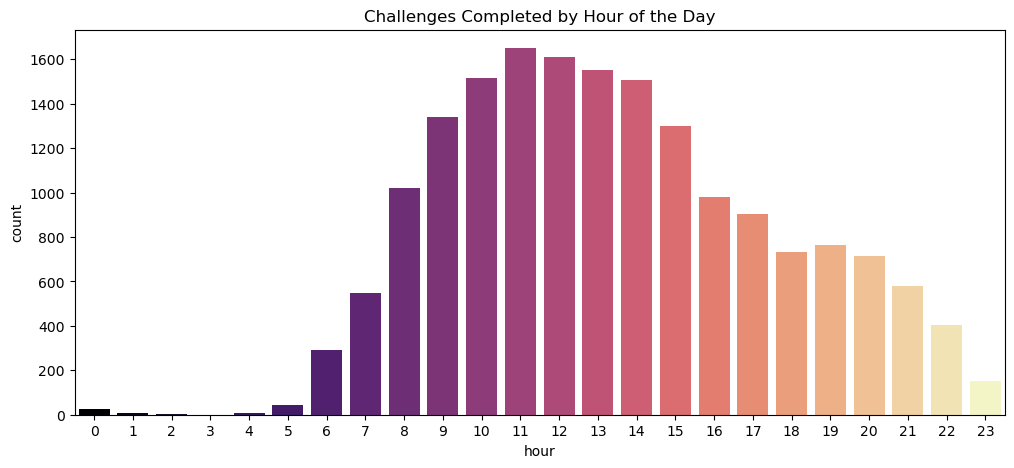

In [245]:
# Time-Based Analysis
df['hour'] = df['created'].dt.hour
df['day_of_week'] = df['created'].dt.day_name()

plt.figure(figsize=(12,5))
sns.countplot(data=df, x='hour', palette='magma', hue='hour', legend=False)
plt.title("Challenges Completed by Hour of the Day")
plt.show()


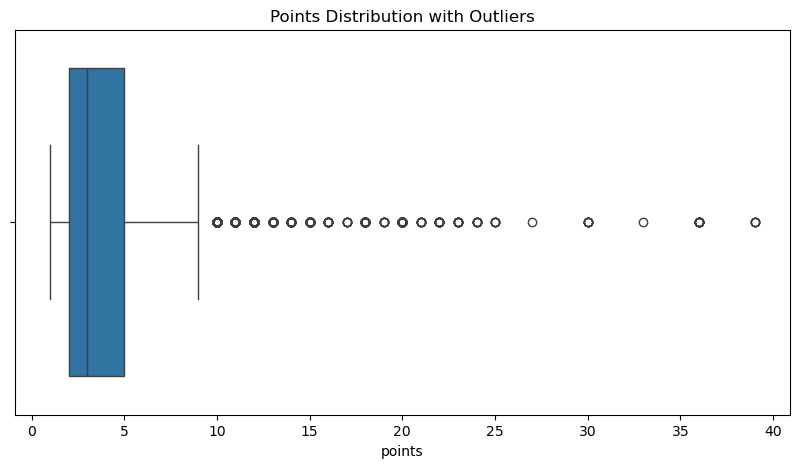

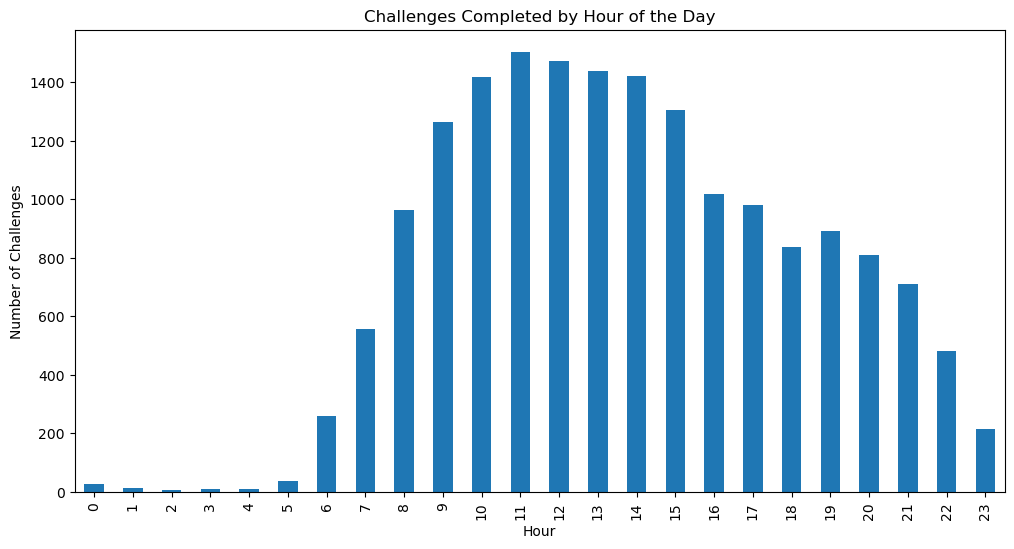

In [265]:
# Points Outliers: Using boxplot to detect abnormal point distributions
plt.figure(figsize=(10,5))
sns.boxplot(x=df['points'])
plt.title("Points Distribution with Outliers")
plt.show()

# Time anomalies: Check if there's an unusual frequency of challenge completions
df['initiated'] = pd.to_datetime(df['initiated'])
df['hour'] = df['initiated'].dt.hour

# Investigate unusual times of day for challenge completions
hourly_counts = df['hour'].value_counts().sort_index()
hourly_counts.plot(kind='bar', figsize=(12,6))
plt.title("Challenges Completed by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Number of Challenges")
plt.show()


In [267]:
duplicates = df[df.duplicated(subset=['team_name', 'challenge_type', 'initiated'], keep=False)]
print(duplicates)

                   team_name challenge_type  \
2      FRENCHTUKTUKADVENTURE      questbook   
3      FRENCHTUKTUKADVENTURE      questbook   
32          Fantukkingtastic      questbook   
33          Fantukkingtastic      questbook   
37          Fantukkingtastic       location   
...                      ...            ...   
17728       Fantukkingtastic       location   
17789           RoadTripperz      questbook   
17790           RoadTripperz      questbook   
17857             bamfamilia      questbook   
17858             bamfamilia      questbook   

                             location_name  location_zone      location_area  \
2                                      NaN              0                NaN   
3                                      NaN              0                NaN   
32                                     NaN              0                NaN   
33                                     NaN              0                NaN   
37     Galle International Cricket 

challenge_type
questbook    12327
location      5332
Name: count, dtype: int64


/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_1538/4221801249.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_challenges.head(10).index, y=popular_challenges.head(10).values, palette='coolwarm')


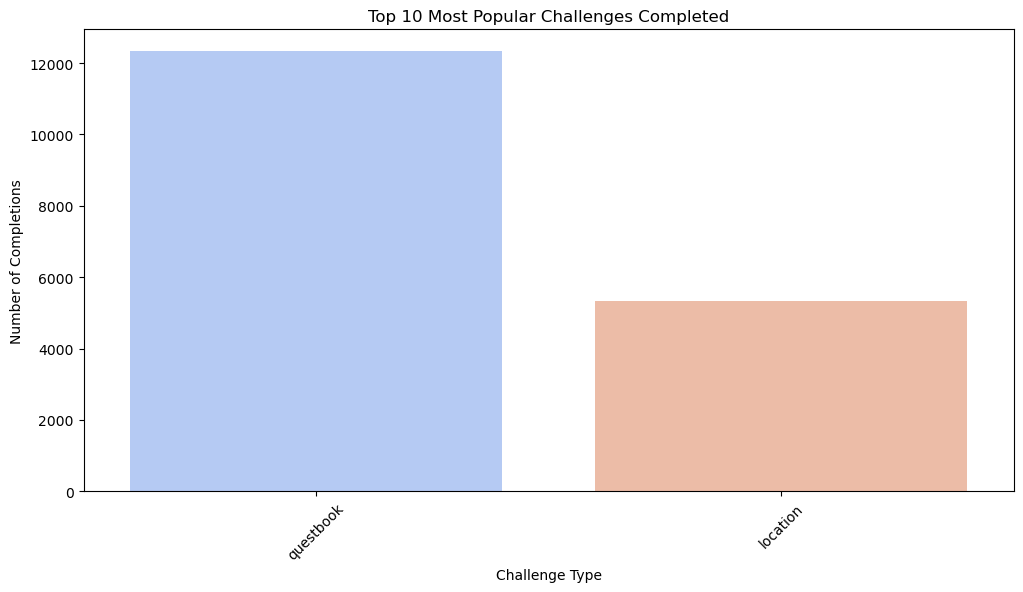

In [273]:
# Count the number of times each challenge type was completed
popular_challenges = df['challenge_type'].value_counts()

# Display the top 10 most popular challenges
print(popular_challenges.head(10))

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(x=popular_challenges.head(10).index, y=popular_challenges.head(10).values, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel("Challenge Type")
plt.ylabel("Number of Completions")
plt.title("Top 10 Most Popular Challenges Completed")
plt.show()

/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_1538/2212109093.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


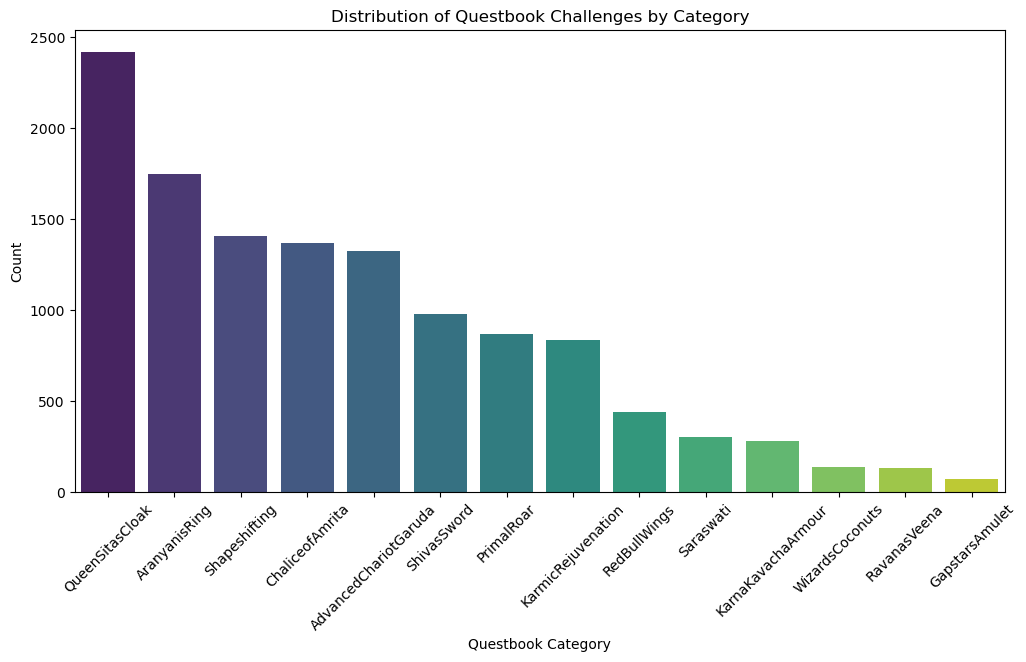

/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_1538/2212109093.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='coolwarm')


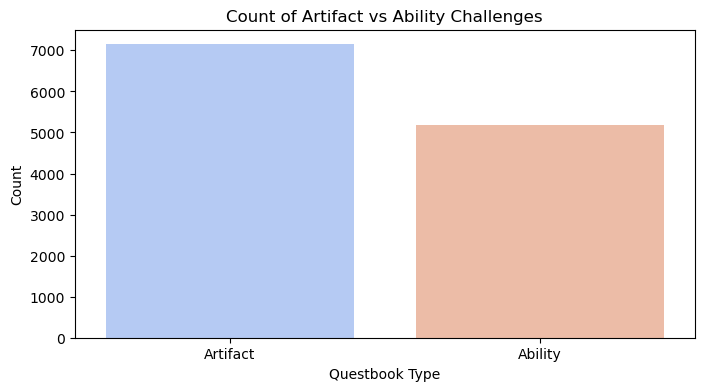

In [275]:

# Count the number of challenges per category
category_counts = df['questbook_category'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Questbook Category")
plt.ylabel("Count")
plt.title("Distribution of Questbook Challenges by Category")
plt.show()

# Count the number of Artifact vs Ability
type_counts = df['questbook_type'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='coolwarm')
plt.xlabel("Questbook Type")
plt.ylabel("Count")
plt.title("Count of Artifact vs Ability Challenges")
plt.show()


       questbook_category  count       mean  min  max
0   AdvancedChariotGaruda   1326   3.723228    2   10
1           AranyanisRing   1748   2.899314    1   10
2         ChaliceofAmrita   1368   3.428363    2    5
3          GapstarsAmulet     74   6.000000    6    6
4      KarmicRejuvenation    834   4.538369    2   10
5      KarnaKavachaArmour    283   4.621908    3   10
6              PrimalRoar    871   2.678530    2    5
7         QueenSitasCloak   2420   2.234711    1    8
8            RavanasVeena    132  11.424242    5   20
9            RedBullWings    440   2.813636    2    5
10              Saraswati    302   5.291391    2   10
11          Shapeshifting   1409   3.136267    2   10
12            ShivasSword    980   3.279592    2    6
13        WizardsCoconuts    140  10.000000   10   10


/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_1538/564929741.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['questbook_type'], y=df['points'], palette='coolwarm')


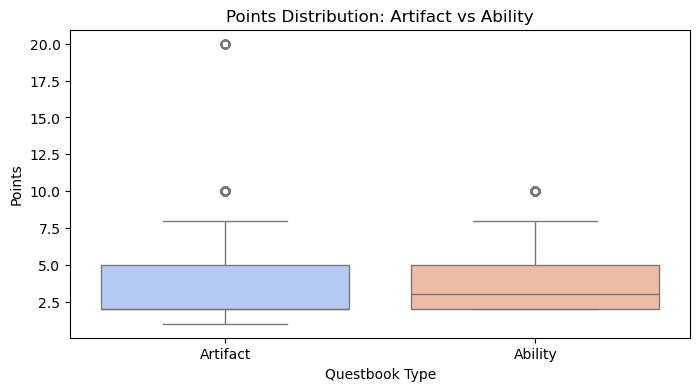

In [277]:
# Group by category and calculate points statistics
points_stats = df.groupby('questbook_category')['points'].agg(['count', 'mean', 'min', 'max']).reset_index()
print(points_stats)

# Compare points distribution for Artifact vs. Ability
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['questbook_type'], y=df['points'], palette='coolwarm')
plt.xlabel("Questbook Type")
plt.ylabel("Points")
plt.title("Points Distribution: Artifact vs Ability")
plt.show()


/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_1538/2610092086.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_performance.head(10)['team_name'], y=team_performance.head(10)['points'], palette='viridis')


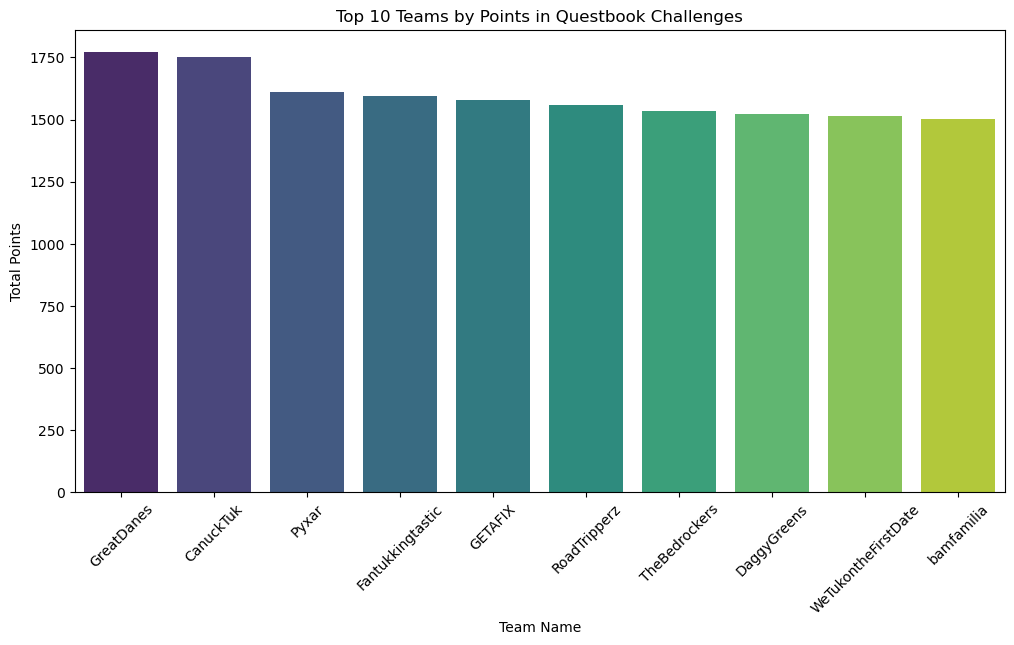

In [279]:
# Aggregate total points for each team
team_performance = df.groupby('team_name')['points'].sum().reset_index()
team_performance = team_performance.sort_values(by='points', ascending=False)

# Top 10 Teams by Total Points
plt.figure(figsize=(12, 6))
sns.barplot(x=team_performance.head(10)['team_name'], y=team_performance.head(10)['points'], palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Team Name")
plt.ylabel("Total Points")
plt.title("Top 10 Teams by Points in Questbook Challenges")
plt.show()


/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_1538/2943192741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_popularity.index, y=category_popularity.values, palette='plasma')


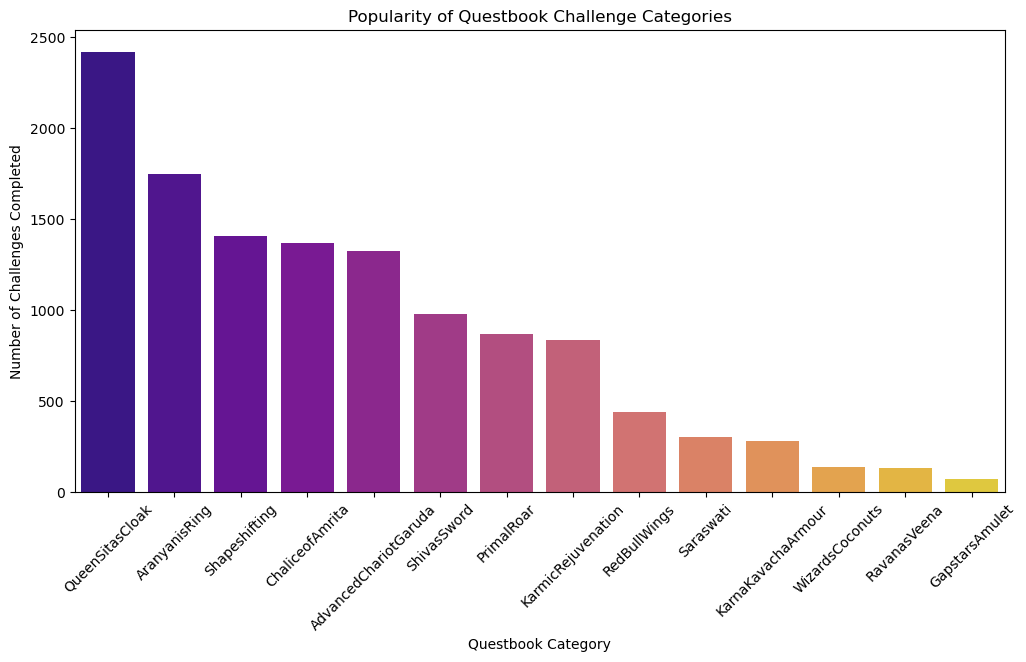

In [283]:
# Count number of completions per category
category_popularity = df['questbook_category'].value_counts()

# Plot the most popular categories
plt.figure(figsize=(12, 6))
sns.barplot(x=category_popularity.index, y=category_popularity.values, palette='plasma')
plt.xticks(rotation=45)
plt.xlabel("Questbook Category")
plt.ylabel("Number of Challenges Completed")
plt.title("Popularity of Questbook Challenge Categories")
plt.show()


/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_1538/1116851625.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='challenge_type', y='points', data=challenge_avg_points, palette='viridis')


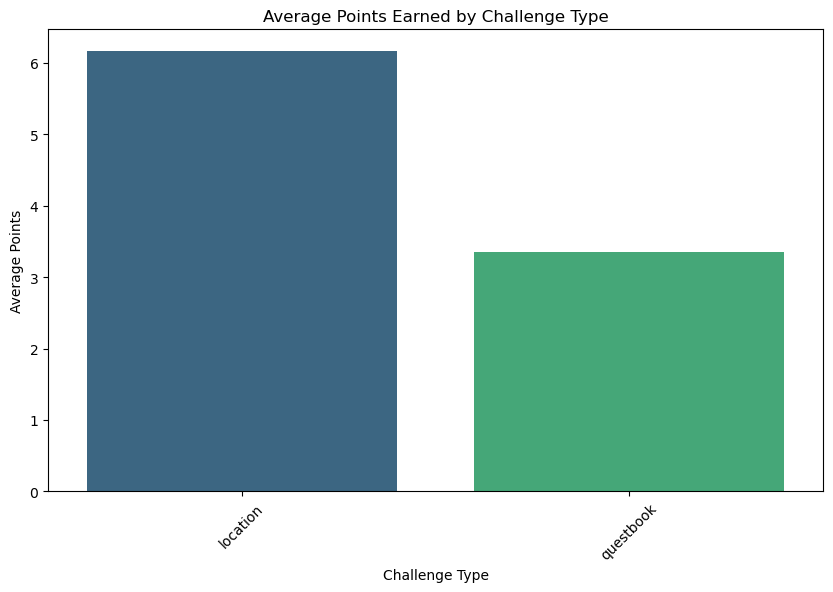

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Grouping data by challenge type and calculating average points
challenge_avg_points = df.groupby('challenge_type')['points'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='challenge_type', y='points', data=challenge_avg_points, palette='viridis')

# Adding labels and title
plt.xlabel("Challenge Type")
plt.ylabel("Average Points")
plt.title("Average Points Earned by Challenge Type")
plt.xticks(rotation=45)
plt.show()


/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_1538/145828022.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_locations['location_name'], x=top_locations['count'], palette='viridis')


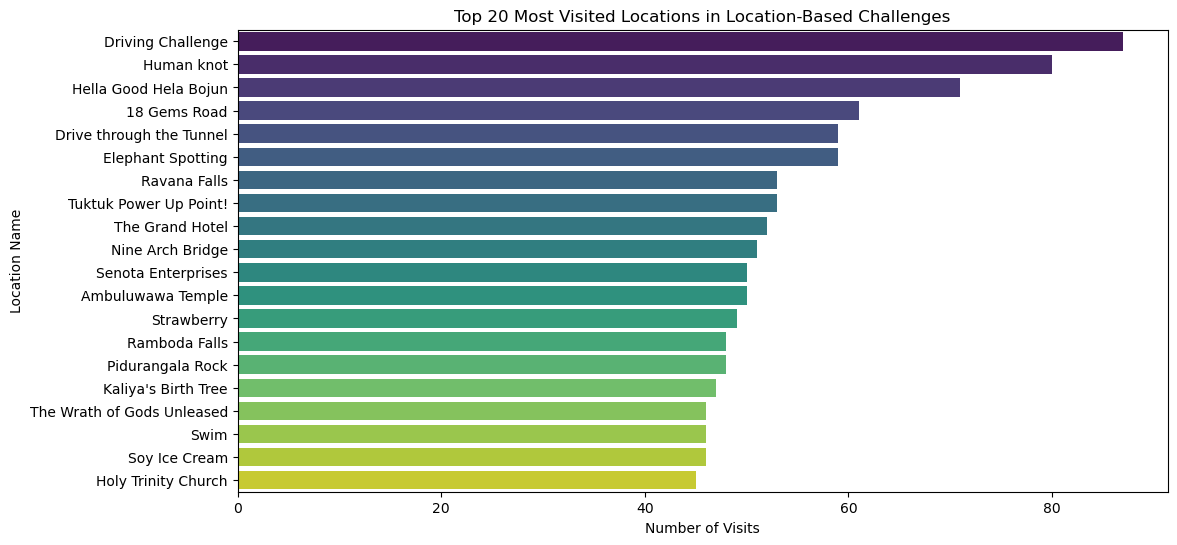

In [297]:
# Filtering dataset for location-based challenges
location_challenges = df[df['challenge_type'] == 'location']

# Counting occurrences of each location
location_counts = location_challenges['location_name'].value_counts().reset_index()
location_counts.columns = ['location_name', 'count']

# Selecting top 20 most visited locations
top_locations = location_counts.head(20)

# Plotting bar chart for most visited locations
plt.figure(figsize=(12, 6))
sns.barplot(y=top_locations['location_name'], x=top_locations['count'], palette='viridis')
plt.xlabel("Number of Visits")
plt.ylabel("Location Name")
plt.title("Top 20 Most Visited Locations in Location-Based Challenges")
plt.show()


/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_1538/455737224.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_challenges['questbook'], x=top_challenges['count'], palette='viridis')


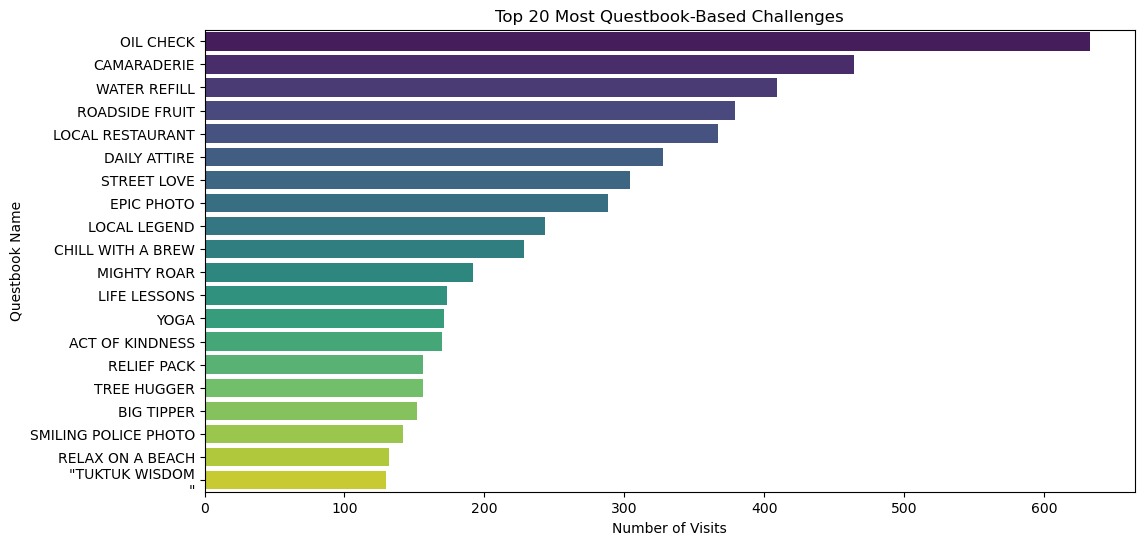

In [301]:
# Filtering dataset for location-based challenges
questbook_challenges = df[df['challenge_type'] == 'questbook']

# Counting occurrences of each location
questbook_counts = questbook_challenges['questbook'].value_counts().reset_index()
questbook_counts.columns = ['questbook', 'count']

# Selecting top 20 most visited locations
top_challenges = questbook_counts.head(20)

# Plotting bar chart for most visited locations
plt.figure(figsize=(12, 6))
sns.barplot(y=top_challenges['questbook'], x=top_challenges['count'], palette='viridis')
plt.xlabel("Number of Visits")
plt.ylabel("Questbook Name")
plt.title("Top 20 Most Questbook-Based Challenges")
plt.show()

/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_1538/3574971857.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=least_visited_locations['location_name'], x=least_visited_locations['count'], palette='mako')


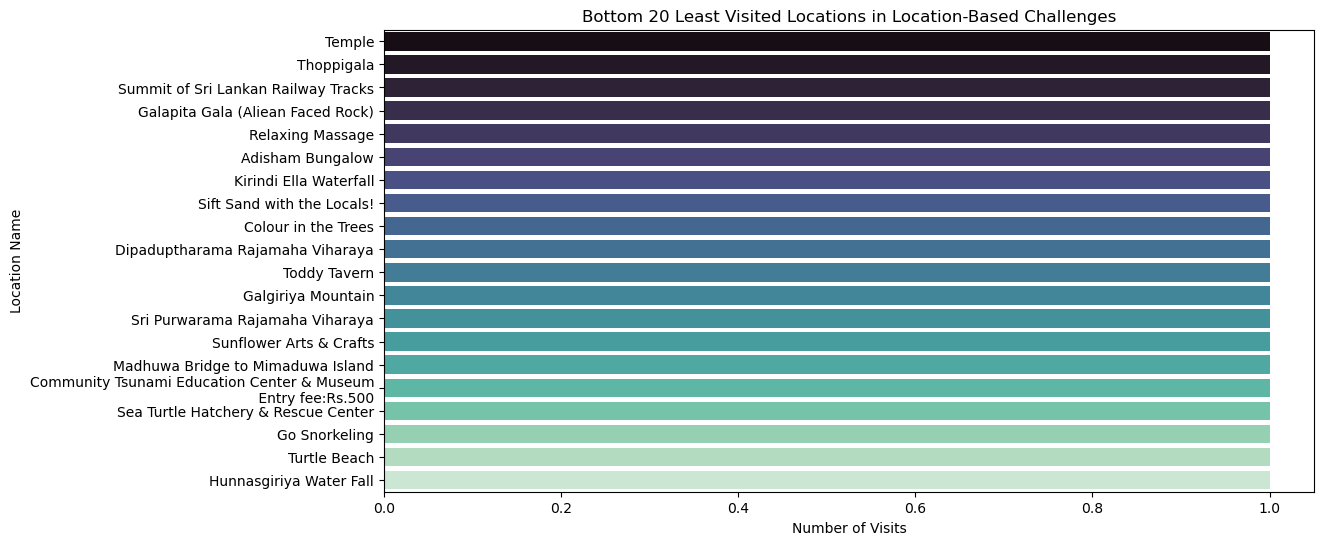

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering dataset for location-based challenges
location_challenges = df[df['challenge_type'] == 'location']

# Counting occurrences of each location
location_counts = location_challenges['location_name'].value_counts().reset_index()
location_counts.columns = ['location_name', 'count']

# Selecting bottom 20 least visited locations
least_visited_locations = location_counts.tail(20)

# Plotting bar chart for least visited locations
plt.figure(figsize=(12, 6))
sns.barplot(y=least_visited_locations['location_name'], x=least_visited_locations['count'], palette='mako')
plt.xlabel("Number of Visits")
plt.ylabel("Location Name")
plt.title("Bottom 20 Least Visited Locations in Location-Based Challenges")
plt.show()


/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_1538/3638647582.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=least_completed_questbook['questbook_name'], x=least_completed_questbook['count'], palette='mako')


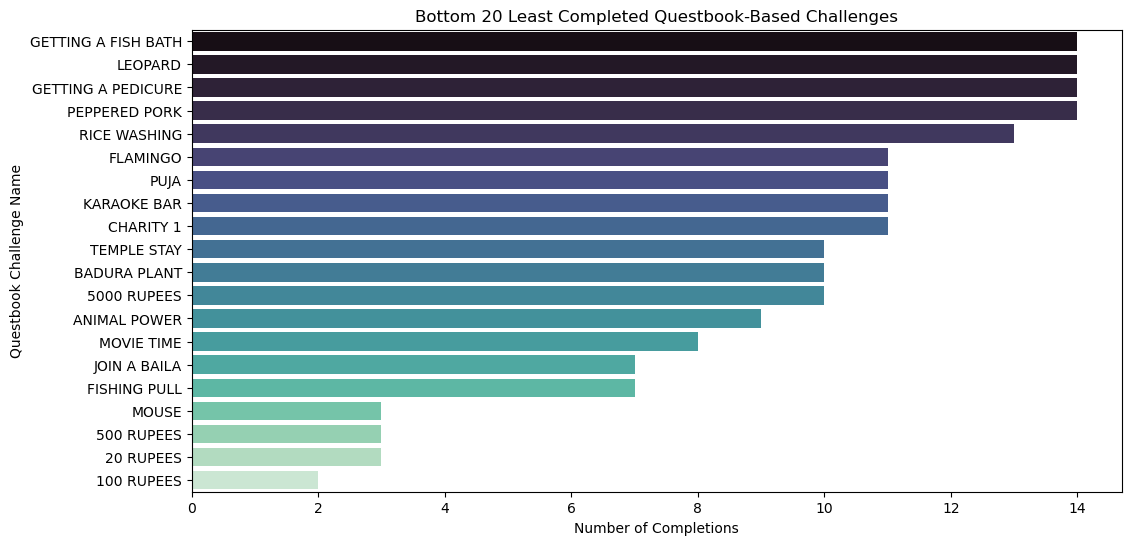

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering dataset for questbook-based challenges
questbook_challenges = df[df['challenge_type'] == 'questbook']

# Counting occurrences of each questbook challenge
questbook_counts = questbook_challenges['questbook_name'].value_counts().reset_index()
questbook_counts.columns = ['questbook_name', 'count']

# Selecting bottom 20 least completed questbook challenges
least_completed_questbook = questbook_counts.tail(20)

# Plotting bar chart for least completed questbook challenges
plt.figure(figsize=(12, 6))
sns.barplot(y=least_completed_questbook['questbook_name'], x=least_completed_questbook['count'], palette='mako')
plt.xlabel("Number of Completions")
plt.ylabel("Questbook Challenge Name")
plt.title("Bottom 20 Least Completed Questbook-Based Challenges")
plt.show()


/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_1538/3089455183.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_location_areas['location_area'], x=top_location_areas['count'], palette='viridis')


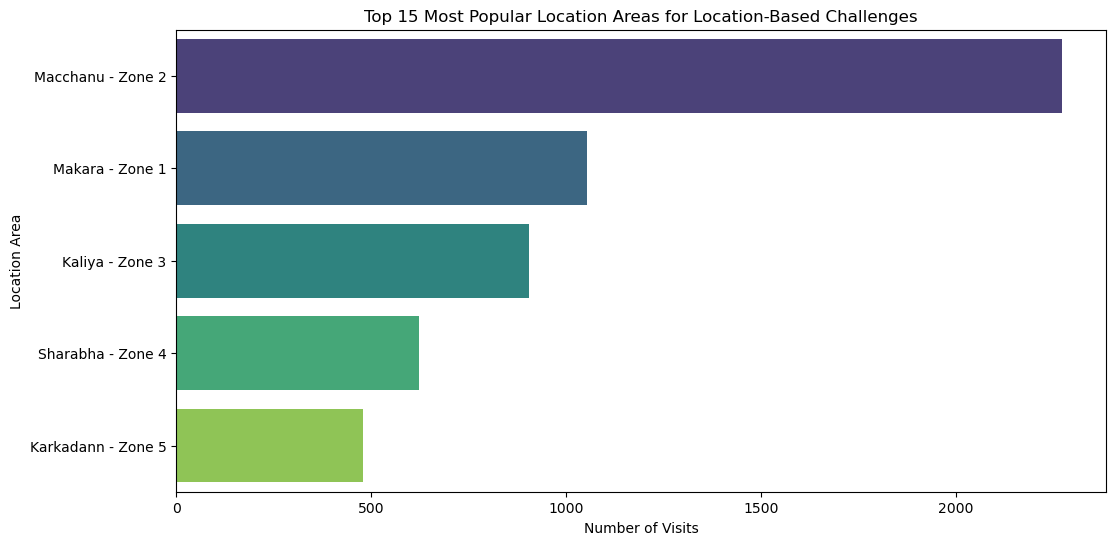

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering dataset for location-based challenges
location_challenges = df[df['challenge_type'] == 'location']

# Counting occurrences of each location_area
location_area_counts = location_challenges['location_area'].value_counts().reset_index()
location_area_counts.columns = ['location_area', 'count']

# Selecting top 15 most popular location areas
top_location_areas = location_area_counts.head(15)

# Plotting bar chart for most popular location areas
plt.figure(figsize=(12, 6))
sns.barplot(y=top_location_areas['location_area'], x=top_location_areas['count'], palette='viridis')
plt.xlabel("Number of Visits")
plt.ylabel("Location Area")
plt.title("Top 15 Most Popular Location Areas for Location-Based Challenges")
plt.show()
